<a href="https://colab.research.google.com/github/gajanankumar/Regression_Capstone_Project/blob/branch2/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of the day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)


## <b> Data Information </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>
Dataset contains 8760 rows and 14 columns 

### <b>Attribute Information: </b>

* ### Date : year-month-day(object)
* ### Rented Bike count - Count of bikes rented at each hour(Integer)
* ### Hour - Hour of he day(Integer)
* ### Temperature-Temperature in Celsius(Numeric)
* ### Humidity - %(Integer)
* ### Windspeed - m/s(Numeric)
* ### Visibility - 10m (Integer)
* ### Dew point temperature - Celsius (Numeric)
* ### Solar radiation - MJ/m2(Numeric)
* ### Rainfall - mm(Numeric)
* ### Snowfall - cm(Numeric)
* ### Seasons - Winter, Spring, Summer, Autumn(object)
* ### Holiday - Holiday/No holiday(object)
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)(object)

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn as sk
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from numpy import math
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the dataset
dataset=pd.read_csv('/content/drive/MyDrive/mlprojects/SeoulBikeData.csv',encoding='cp1252')

### Exploring Data

In [ ]:
#Getting first 5 records from dataset
dataset.head()


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
dataset.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
dataset.info() # Getting information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

From above infomation we conclude that dataset contains 14 columns and 8760 records. it contains all records non null.

In [ ]:
dataset.describe() # getting statistical summary about numerical features

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
dataset.describe(include='all') # getting statistical summary including all features

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


**checking duplicate values**

In [ ]:
#chcking duplicate records in dataset
len(dataset[dataset.duplicated()])

0

**Checking for null values**

In [ ]:
dataset.isna().sum() # checking missing values in dataset

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
# checking unique values 
dataset.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

**From above result we conclude that here in this dataset no missing values and not any duplicated records present.**

In [ ]:
dataset.columns # checking features names

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Renaming columns for convinence 
dataset=dataset.rename(columns={'Rented Bike Count':'Rented_Bike_Count','Temperature(°C)':'Temperature','Humidity(%)':'Humidity',
                      'Wind speed (m/s)':'Wind_speed','Visibility (10m)':'Visibility','Dew point temperature(°C)':'Dew_point_temperature',
                      'Solar Radiation (MJ/m2)':'Solar_Radiation','Rainfall(mm)':'Rainfall',
                      'Snowfall (cm)':'Snowfall','Functioning Day':'Functioning_Day'})

In [ ]:
dataset.columns # checking features names

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

In [ ]:
dataset['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [ ]:
dataset['Functioning_Day'].value_counts()

Yes    8465
No      295
Name: Functioning_Day, dtype: int64

In [ ]:
dataset['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

##Exploratory data analysys

In [ ]:
dataset.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

In [ ]:
dataset.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# Changing date feature datatype to datetime

dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Date'].dtype

dtype('<M8[ns]')

In [ ]:
dataset['Date']

0      2017-01-12
1      2017-01-12
2      2017-01-12
3      2017-01-12
4      2017-01-12
          ...    
8755   2018-11-30
8756   2018-11-30
8757   2018-11-30
8758   2018-11-30
8759   2018-11-30
Name: Date, Length: 8760, dtype: datetime64[ns]

In [ ]:
dataset['year'] = dataset['Date'].dt.year
dataset['month'] = dataset['Date'].dt.month

dataset['day'] = dataset['Date'].dt.day_name()

In [ ]:
dataset['day']

0       Thursday
1       Thursday
2       Thursday
3       Thursday
4       Thursday
          ...   
8755      Friday
8756      Friday
8757      Friday
8758      Friday
8759      Friday
Name: day, Length: 8760, dtype: object

In [ ]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
dataset['weekday_weekend']=dataset['day'].apply(lambda x : "weekend" if x=='Saturday' or x=='Sunday' else "weekday" )

In [ ]:
# checking no of years
dataset['weekday_weekend'].value_counts()

weekday    6216
weekend    2544
Name: weekday_weekend, dtype: int64

In [ ]:
#Change the int64 column into catagory column
cols=['Hour','month','weekday_weekend']
for col in cols:
  dataset[col]=dataset[col].astype('category')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   Rented_Bike_Count      8760 non-null   int64         
 2   Hour                   8760 non-null   category      
 3   Temperature            8760 non-null   float64       
 4   Humidity               8760 non-null   int64         
 5   Wind_speed             8760 non-null   float64       
 6   Visibility             8760 non-null   int64         
 7   Dew_point_temperature  8760 non-null   float64       
 8   Solar_Radiation        8760 non-null   float64       
 9   Rainfall               8760 non-null   float64       
 10  Snowfall               8760 non-null   float64       
 11  Seasons                8760 non-null   object        
 12  Holiday                8760 non-null   object        
 13  Fun

we convert the "date" column into 3 different column i.e "year","month","day". The "year" column in our data set is basically contain the 2 unique number contains the details of from 2017 december to 2018 november so if i consider this is a one year then we don't need the "year" column so we drop it. The other column "day", it contains the details about the each day of the month, for our relevence we don't need each day of each month data but we need the data about, if a day is a weekday or a weekend so we convert it into this format and drop the "day" column.

In [ ]:
# Droping unnecessary columns.
# Year basically contains details from 2017 december to 2018 november so we considers this is one year.

dataset=dataset.drop(columns=['Date','day','year'],axis=1)

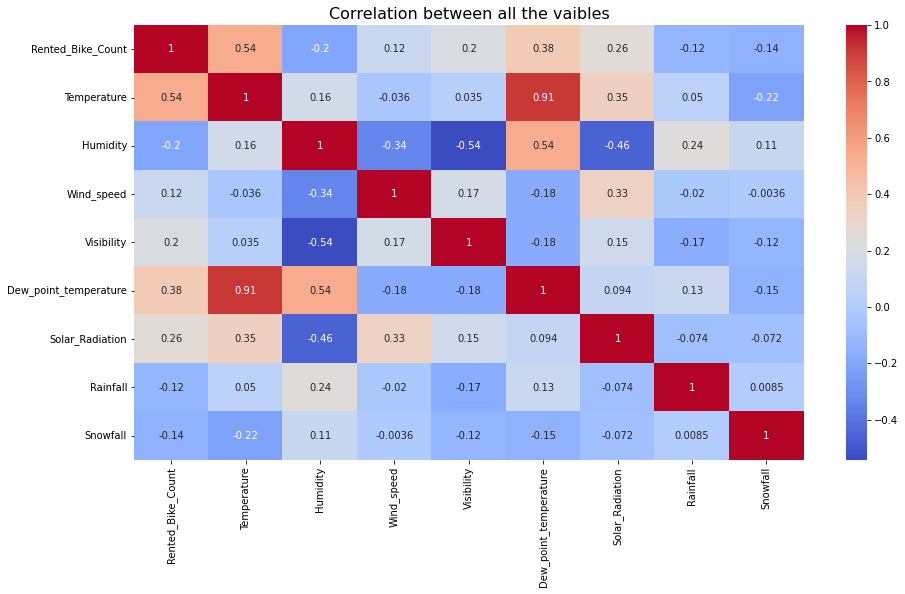

In [ ]:
#Heatmap for co-relation in features
plt.figure(figsize=(15, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between all the vaibles', size=16)
plt.show()

### Obeservations:
##### Dew point temperature and temperature are highly related.
###### Humidity has low correlation with visibility due to solar radiation.

In [ ]:
# Droping highly correlated features for eleminating Multico-linearity
dataset=dataset.drop(['Dew_point_temperature'],axis=1)

###**Univariate Analysis :**

In [ ]:
# cateogrical feature 

cat_features = list(set(dataset.describe(include = 'all')) - set(dataset.describe()))
cat_features

['Holiday', 'Seasons', 'Hour', 'month', 'weekday_weekend', 'Functioning_Day']

In [ ]:
# Numerical features 

num_features = list(set(dataset.describe()))
num_features 

['Rainfall',
 'Rented_Bike_Count',
 'Solar_Radiation',
 'Wind_speed',
 'Temperature',
 'Snowfall',
 'Humidity',
 'Visibility']

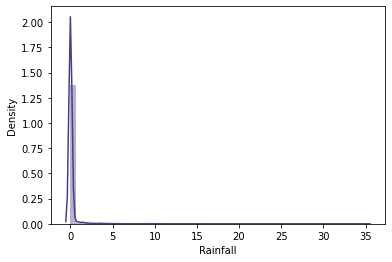

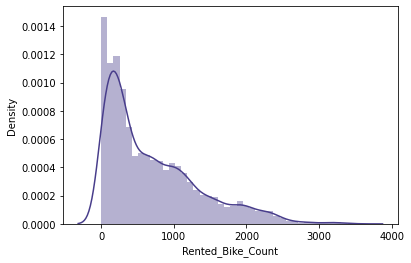

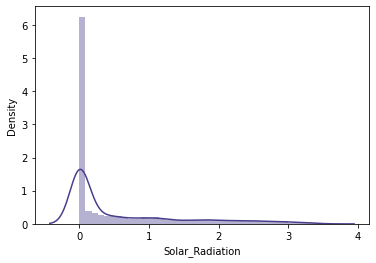

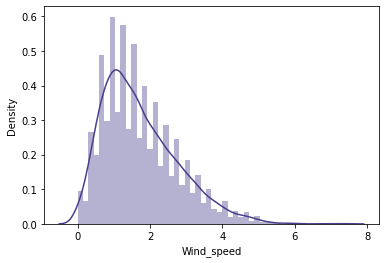

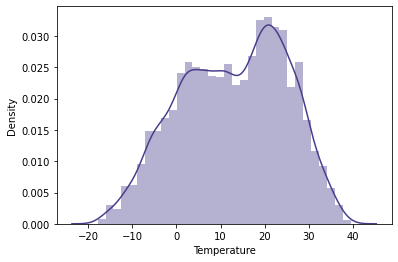

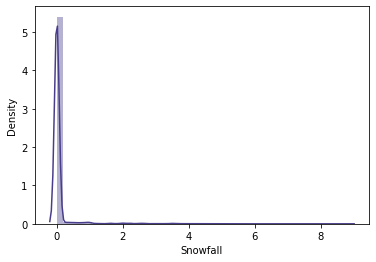

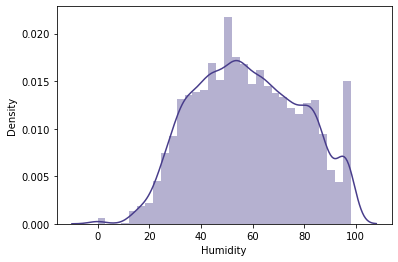

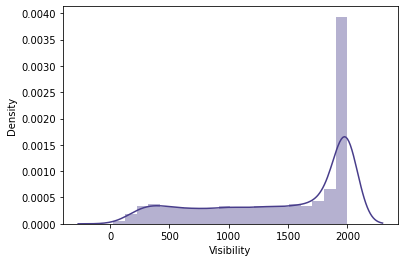

In [ ]:
#plotting distplots to analyze the distribution of all numerical features
for feat in num_features:
  plt.figure(figsize=(6,4))
  sns.distplot(x=dataset[feat],color= 'darkslateblue')
  plt.xlabel(feat)
plt.show()

**From above plot we conclude that for some fetures distributions are rightly skewed and for some leftly skewed.**

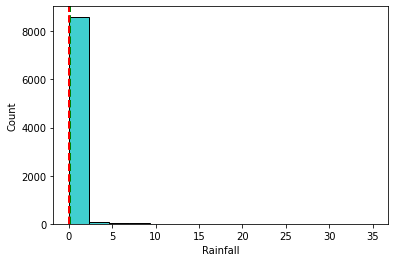

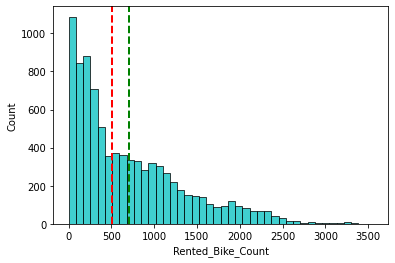

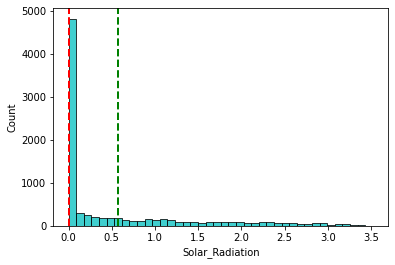

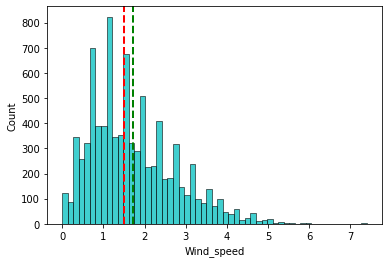

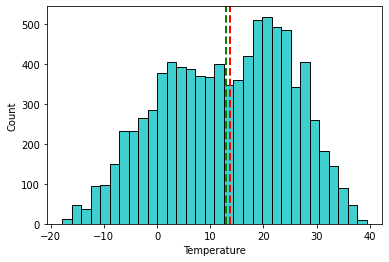

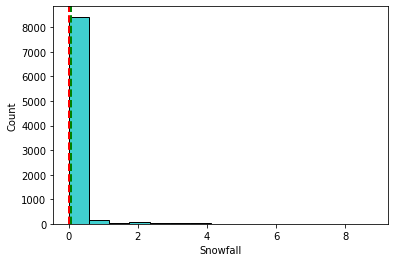

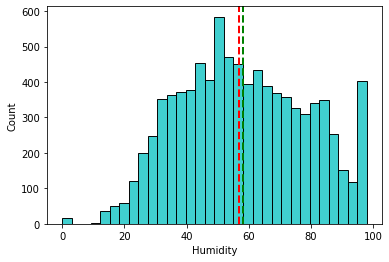

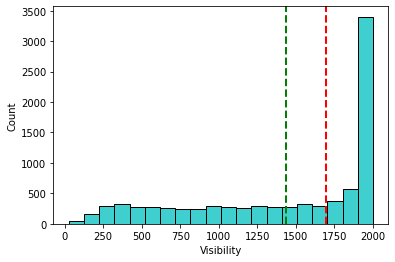

In [ ]:
#plotting histogram with mean and median

for col in num_features:
  sns.histplot(dataset[col],color= 'c')
  plt.axvline(dataset[col].mean(), color='g', linestyle='dashed', linewidth=2)
  plt.axvline(dataset[col].median(), color='red', linestyle='dashed', linewidth=2)   
  plt.show()

**The features which are skewed, their mean and the median are also skewed.**
**Rented_bike_count is right skewed.**

**Outliers Detection using Box plot**

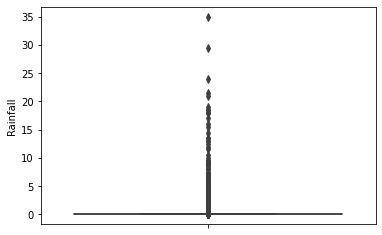

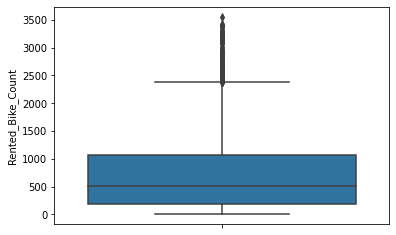

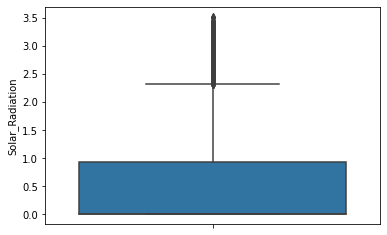

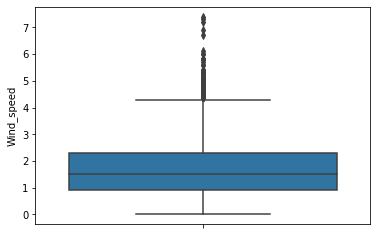

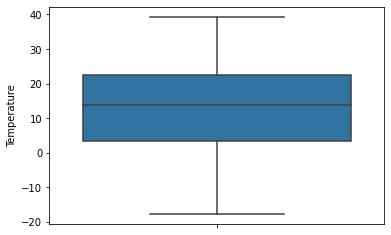

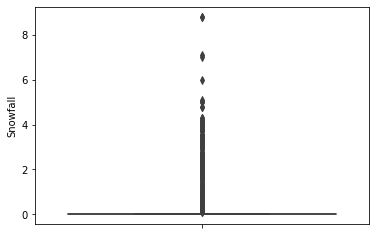

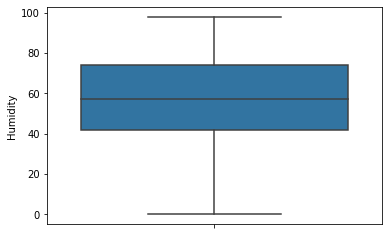

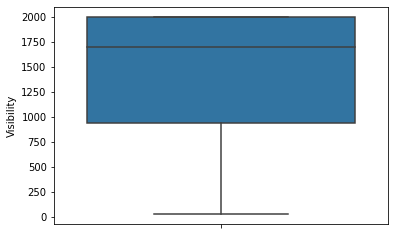

In [ ]:
# Numerical features plotting Box plot
for nfet in num_features:
    sns.boxplot(y = dataset[nfet])
    plt.show()

In [ ]:
dataset.isna().sum()

Rented_Bike_Count    0
Hour                 0
Temperature          0
Humidity             0
Wind_speed           0
Visibility           0
Solar_Radiation      0
Rainfall             0
Snowfall             0
Seasons              0
Holiday              0
Functioning_Day      0
month                0
weekday_weekend      0
dtype: int64

In [ ]:
# finding the inter-quartile range 

Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Rented_Bike_Count     874.25
Temperature            19.00
Humidity               32.00
Wind_speed              1.40
Visibility           1060.00
Solar_Radiation         0.93
Rainfall                0.00
Snowfall                0.00
dtype: float64


In [ ]:
# listing features to remove outliers

features = list(dataset.columns)
features = features[2:]
list_0 = ['Hour','Seasons','Holiday','Functioning_Day','month','year','weekday_weekend']
new_features = [x for x in features if x not in list_0]
new_features

['Temperature',
 'Humidity',
 'Wind_speed',
 'Visibility',
 'Solar_Radiation',
 'Rainfall',
 'Snowfall']

In [ ]:
dataset.isna().sum()

Rented_Bike_Count    0
Hour                 0
Temperature          0
Humidity             0
Wind_speed           0
Visibility           0
Solar_Radiation      0
Rainfall             0
Snowfall             0
Seasons              0
Holiday              0
Functioning_Day      0
month                0
weekday_weekend      0
dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Seasons            8760 non-null   object  
 10  Holiday            8760 non-null   object  
 11  Functioning_Day    8760 non-null   object  
 12  month              8760 non-null   category
 13  weekday_weekend    8760 non-null   category
dtypes: category(3), float64(5), int64(3), object(3)
memory usage: 779.8+ KB


**From above box plot we conclude that outliers are found in Rented_Bike_Count, Wind_speed, in snowfall and rainfall.**

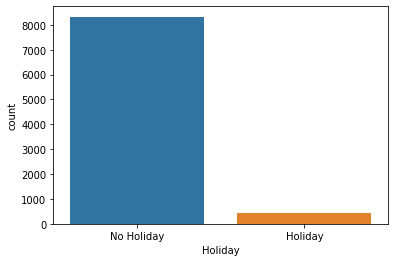

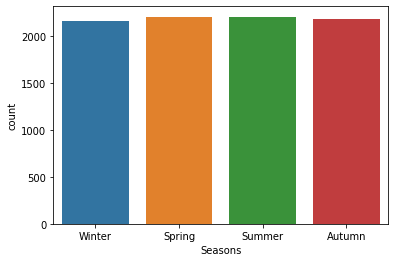

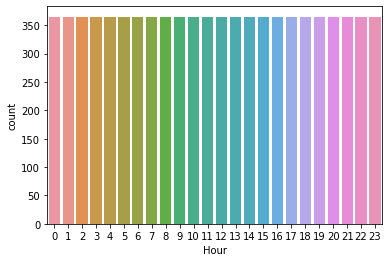

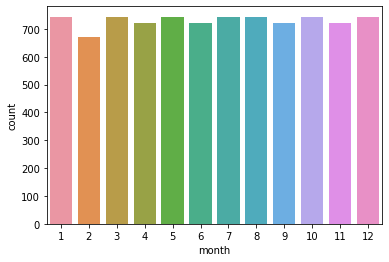

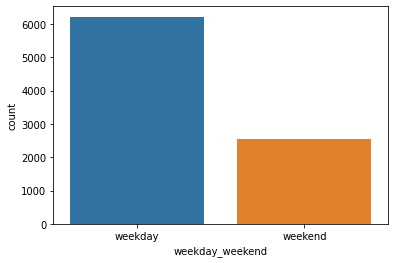

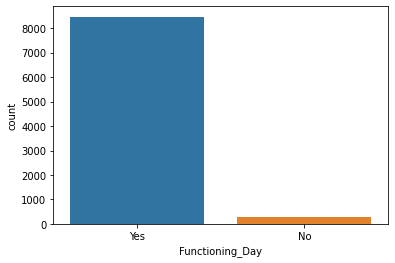

In [ ]:
# bar plot for categorical features
for catf in cat_features :
    sns.countplot(x = dataset[catf],)
    plt.show()

###**Bivariate Analysis :**

In [ ]:
dataset.columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Seasons',
       'Holiday', 'Functioning_Day', 'month', 'weekday_weekend'],
      dtype='object')

[Text(0.5, 1.0, 'Count of Rented bikes based on hour ')]

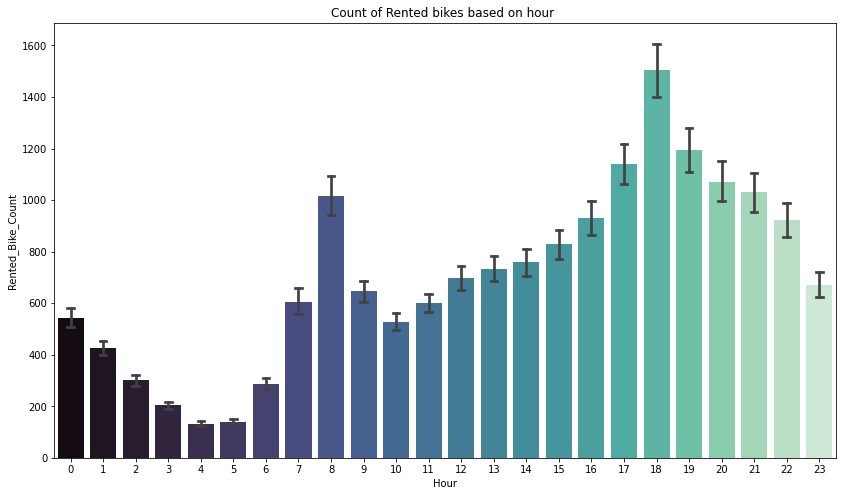

In [ ]:
#anlysis of data by vizualisation using hour and rented bike count.
fig,ax=plt.subplots(figsize=(14,8))
sns.barplot(data=dataset,x='Hour',y='Rented_Bike_Count',ax=ax,capsize=.2,palette = "mako")
ax.set(title='Count of Rented bikes based on hour ')

**From above bar plot we conclude that People generally use rented bikes in morning from 7am to 9am and at evening time 5pm to 8pm.**

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekenday ')]

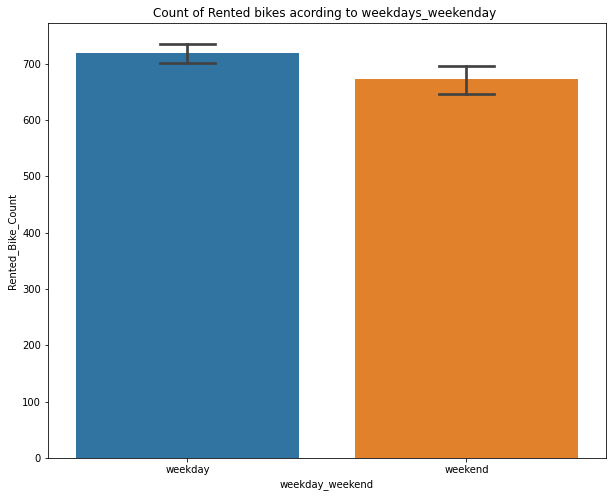

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=dataset,x='weekday_weekend',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to weekdays_weekenday ')

**Weekday has maximum bike count than weekend from above plot we conclude.**

[Text(0.5, 1.0, 'Count of Rented bikes based on weekdays_weekend ')]

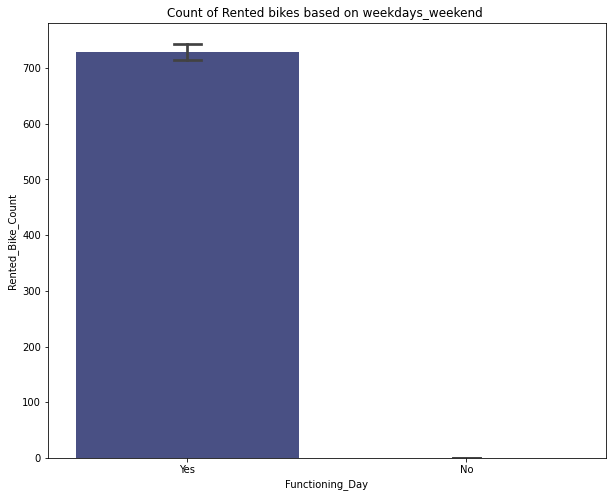

In [ ]:
#anlysis of data by vizualisation using weekdays-weekend and rented bike count.
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=dataset,x='Functioning_Day',y='Rented_Bike_Count',ax=ax,capsize=.1,palette = "mako")
ax.set(title='Count of Rented bikes based on weekdays_weekend ')

**People use rented bike only in functioning day**

[Text(0.5, 1.0, 'Count of Rented bikes based on  Holiday ')]

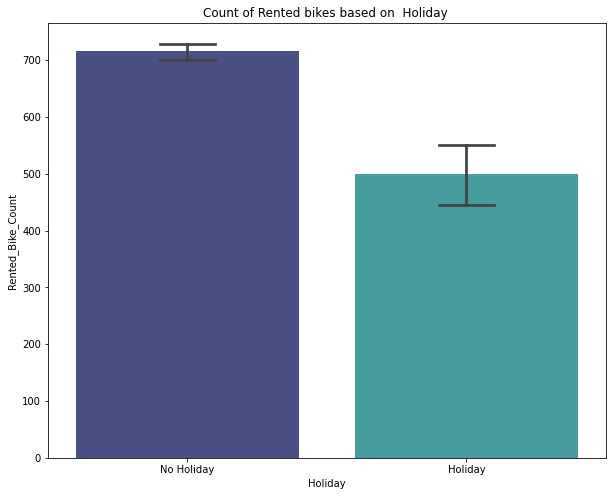

In [ ]:
#anlysis of data by vizualisation using holiday and rented bike count.
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=dataset,x='Holiday',y='Rented_Bike_Count',ax=ax,capsize=.2,palette = "mako")
ax.set(title='Count of Rented bikes based on  Holiday ')

**Use of rented bike is more on 'No holiday' means on working days as compare to 'Holiday'.**

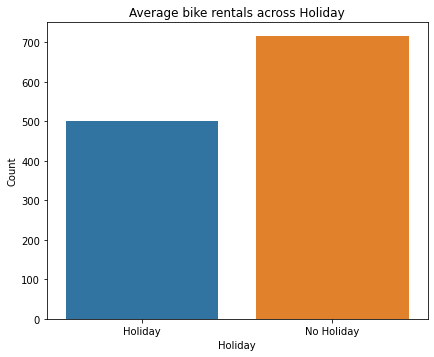

In [ ]:
# Average values across each of the categorical columns 
fig = plt.figure(figsize=(15, 12))
axes = fig.add_subplot(2, 2, 4)
group_season = pd.DataFrame(dataset.groupby(['Holiday'])['Rented_Bike_Count'].mean()).reset_index()
sns.barplot(data=group_season, x='Holiday', y='Rented_Bike_Count', ax=axes)
axes.set(xlabel='Holiday', ylabel='Count', title='Average bike rentals across Holiday')
plt.show()

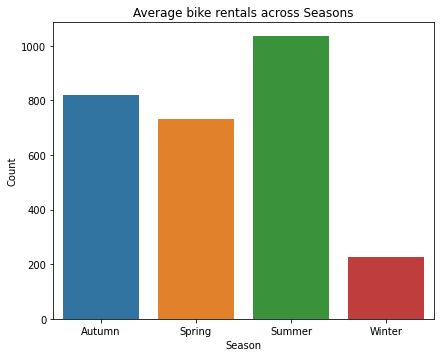

In [ ]:
fig = plt.figure(figsize=(15, 12))
axes = fig.add_subplot(2, 2, 2)
group_season = pd.DataFrame(dataset.groupby(['Seasons'])['Rented_Bike_Count'].mean()).reset_index()
sns.barplot(data=group_season, x='Seasons', y='Rented_Bike_Count', ax=axes)
axes.set(xlabel='Season', ylabel='Count', title='Average bike rentals across Seasons')
plt.show()

**Finding Correlation between dependent and independant variables**

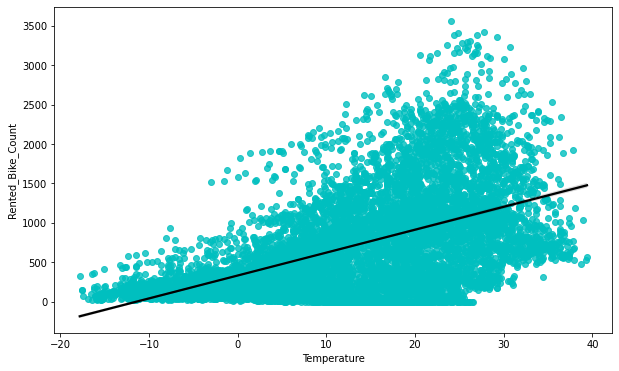

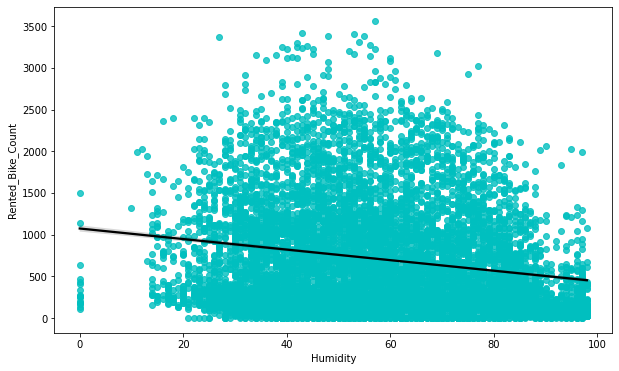

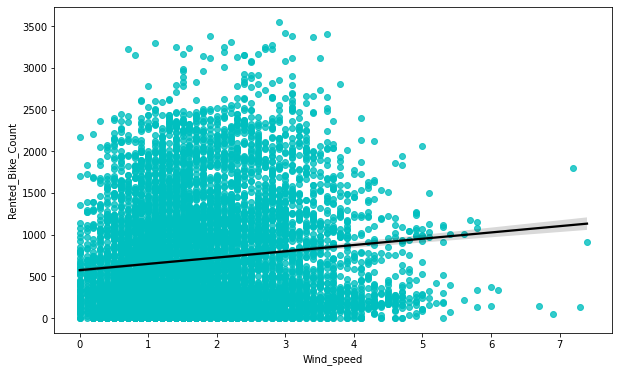

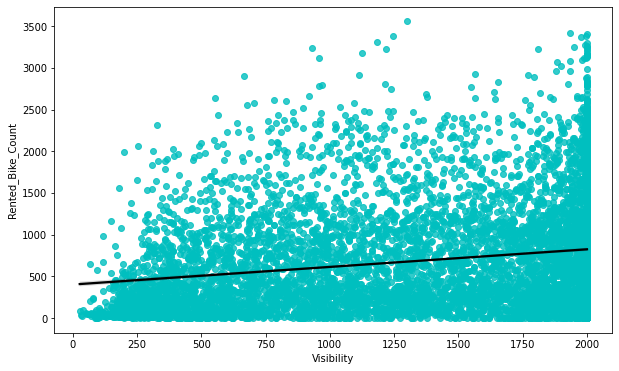

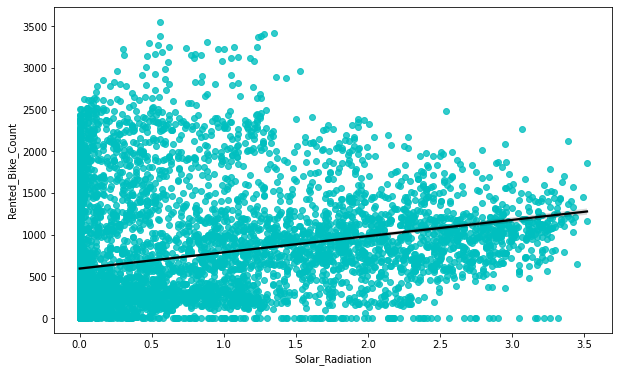

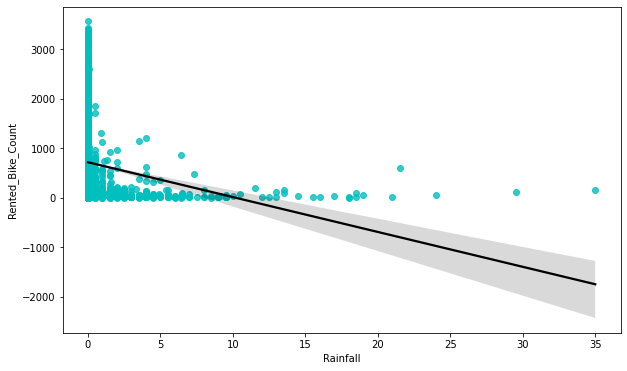

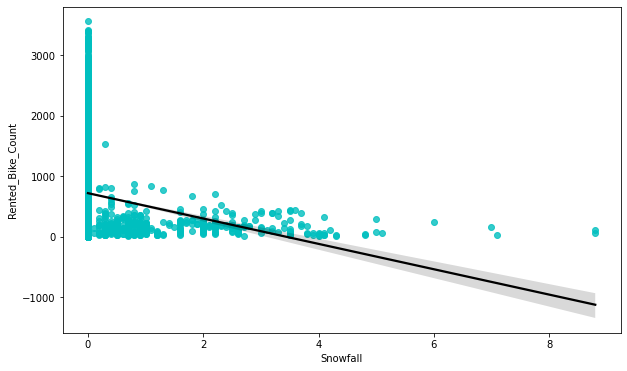

In [ ]:
#plotting the regression plot for all the numerical features
for fet in new_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=dataset[fet],y=dataset['Rented_Bike_Count'],scatter_kws={"color": 'c'}, line_kws={"color": "black"})

**Observations:**


*  The columns 'Hour','Temperature', 'Wind_speed','Visibility', and 'Solar_Radiation' are positively related to the dependent variable. Which means that the rented bike count increases with increase of these features.


*  Whereas, the colums 'Rainfall','Snowfall','Humidity' are those features which are negatively related with the dependent variable, which implies that the rented bike count decreases when these features increases.


In [ ]:
# creating a dataframe containing the count of bikes rented in different temperature

dataset_temp = pd.DataFrame(dataset.groupby('Temperature')['Rented_Bike_Count'].sum())
dataset_temp.reset_index(inplace=True)
dataset_temp

,Temperature,Rented_Bike_Count
0,-17.8,322
1,-17.5,291
2,-17.4,64
3,-16.9,36
4,-16.5,96
...,...,...
541,38.0,1184
542,38.7,475
543,39.0,1033
544,39.3,531


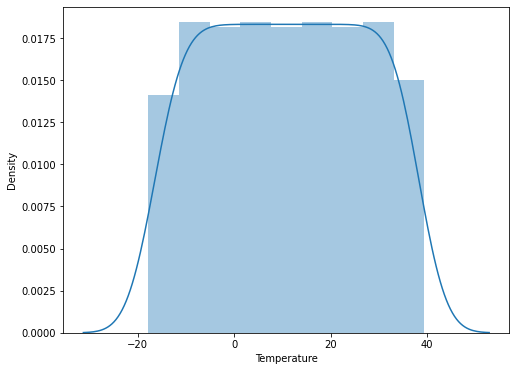

In [ ]:
# plot showing distribution of bike rentals according to temperature intensity

plt.figure(figsize=(8,6))
sns.distplot(dataset_temp['Temperature'])

**Above plot shows that people tend to rent bikes when the temperature is between -5 to 25 degrees.**

In [ ]:
# creating a dataframe containing the count of bikes rented in differant visibility ranges

dataset_visi = pd.DataFrame(dataset.groupby('Visibility')['Rented_Bike_Count'].sum())
dataset_visi.reset_index(inplace=True)

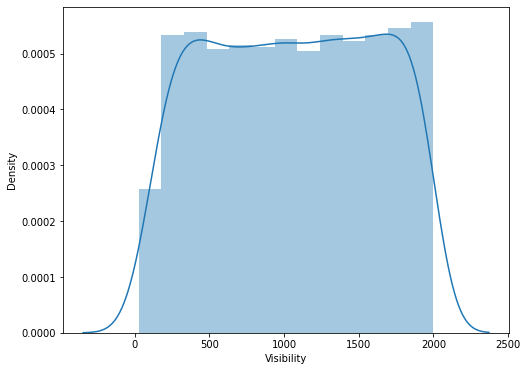

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(dataset_visi['Visibility'])

In [ ]:
dataset.isna().sum()

Rented_Bike_Count    0
Hour                 0
Temperature          0
Humidity             0
Wind_speed           0
Visibility           0
Solar_Radiation      0
Rainfall             0
Snowfall             0
Seasons              0
Holiday              0
Functioning_Day      0
month                0
weekday_weekend      0
dtype: int64

In [ ]:
dataset=dataset.drop('month',axis=1)

**Above plot shows that people tend to rent bikes when the visibility is between 300 to 1700.**

In [ ]:
# Using Pandas get Dummies for Encoding categorical features
dataset1 = pd.get_dummies(dataset,drop_first=True,sparse=True)
dataset1.head()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,Hour_20,Hour_21,Hour_22,Hour_23,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning_Day_Yes,weekday_weekend_weekend
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,1,1,1,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,1,1,1,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,1,1,1,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,1,1,1,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,1,1,1,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Seasons            8760 non-null   object  
 10  Holiday            8760 non-null   object  
 11  Functioning_Day    8760 non-null   object  
 12  weekday_weekend    8760 non-null   category
dtypes: category(2), float64(5), int64(3), object(3)
memory usage: 770.9+ KB


In [ ]:
dataset.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,weekday_weekend
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,weekday
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,weekday
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,weekday
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,weekday
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,weekday


###**Normalising Rented_Bike_Count Column Data.**


####Observations:


*  Rented Bike Count has moderate skewness toward right. And, we already know that the assumption of linear regression tells us that the distribution of dependent variable has to be normal, hence we should perform some operation to make it normal.


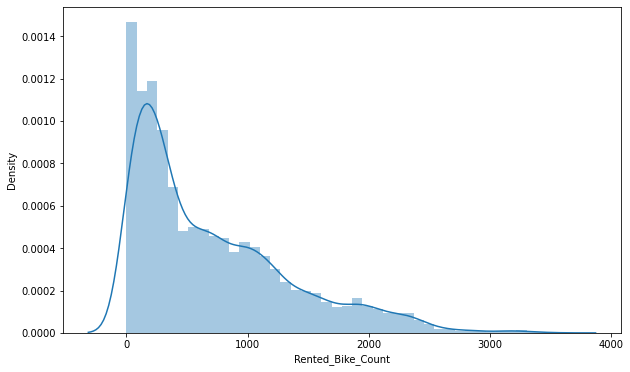

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot((dataset1['Rented_Bike_Count']))

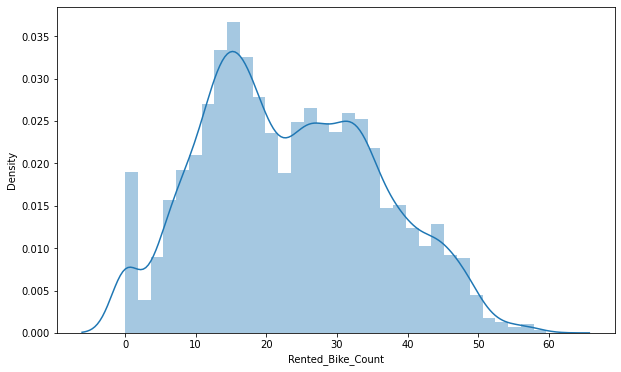

In [ ]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,6))
sns.distplot(np.sqrt(dataset1['Rented_Bike_Count']))

**Model Training**

In [ ]:
# Data spliting and value assigning to variables for Reggression

X = dataset1.drop(columns = ['Rented_Bike_Count'] , axis = 1)
y = np.sqrt(dataset1['Rented_Bike_Count'])

In [ ]:
X.head()

,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,Hour_3,...,Hour_20,Hour_21,Hour_22,Hour_23,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning_Day_Yes,weekday_weekend_weekend
0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,1,1,1,0
2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,1,1,1,0
3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,1,1,1,0
4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,1,1,1,0


In [ ]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

In [ ]:
dataset1.isna().sum()

Rented_Bike_Count          0
Temperature                0
Humidity                   0
Wind_speed                 0
Visibility                 0
Solar_Radiation            0
Rainfall                   0
Snowfall                   0
Hour_1                     0
Hour_2                     0
Hour_3                     0
Hour_4                     0
Hour_5                     0
Hour_6                     0
Hour_7                     0
Hour_8                     0
Hour_9                     0
Hour_10                    0
Hour_11                    0
Hour_12                    0
Hour_13                    0
Hour_14                    0
Hour_15                    0
Hour_16                    0
Hour_17                    0
Hour_18                    0
Hour_19                    0
Hour_20                    0
Hour_21                    0
Hour_22                    0
Hour_23                    0
Seasons_Spring             0
Seasons_Summer             0
Seasons_Winter             0
Holiday_No Hol

# **Implementing Linear Regression.**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size = 0.25, random_state = 0)
print(X_train.shape)
X_test.shape


(6570, 36)


(2190, 36)

In [ ]:
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [ ]:
# initalizing the model
regg = LinearRegression().fit(X_train_std ,y_train)

In [ ]:
# Checking score
regg.score(X_train_std,y_train)

0.744968351224885

In [ ]:
#Checking Coefficent
regg.coef_

array([ 5.14907564, -2.79128546, -0.1515769 ,  0.1090064 ,  1.12467425,
       -1.71797773, -0.01019817, -0.40876859, -1.03974028, -1.48660291,
       -1.89803319, -1.78746241, -0.84493358,  0.40510009,  1.42023987,
        0.15456236, -0.72952149, -0.77001199, -0.63500929, -0.67676495,
       -0.69822892, -0.41349117,  0.0155461 ,  0.80183371,  2.01598186,
        1.45258363,  1.23961532,  1.30710497,  1.03531269,  0.286663  ,
       -1.36807119, -1.26069937, -3.41857136,  0.66418083,  4.84061875,
       -0.33924586])

In [ ]:
# Predicted Train & Test values
 
y_pred_train = regg.predict(X_train_std)
y_pred_test = regg.predict(X_test_std)

In [ ]:
y_pred_test[:6]

array([13.86600886, 23.47993075, 18.74262052, 16.49902805, 34.26379916,
       20.45637865])

In [ ]:
y_test[:6]

4059    17.888544
6914    24.083189
233     15.033296
982     12.845233
5967    25.416530
2182    13.784049
Name: Rented_Bike_Count, dtype: float64

In [ ]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 39.27249671005959
RMSE : 6.266777218799117
MAE : 4.754357123099828
R2 : 0.744968351224885
Adjusted R2 : 0.7407040041018456


In [ ]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Linear regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [ ]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 37.66840903359407
RMSE : 6.13745949343815
MAE : 4.700146565012269
R2 : 0.7615416428054266
Adjusted R2 : 0.7575544152815044


In [ ]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'Linear regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

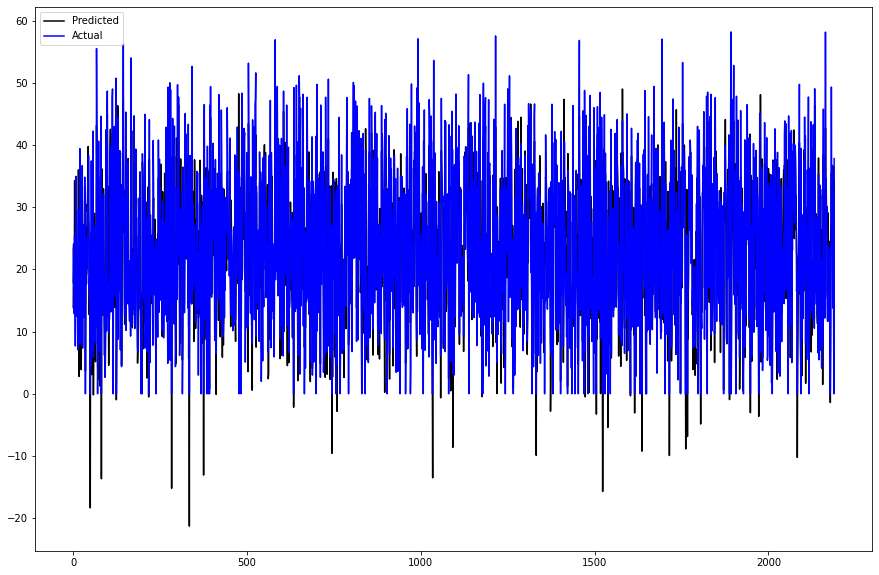

In [ ]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test, color='k')
plt.plot(np.array(y_test), color='b')
plt.legend(["Predicted","Actual"])
plt.show()

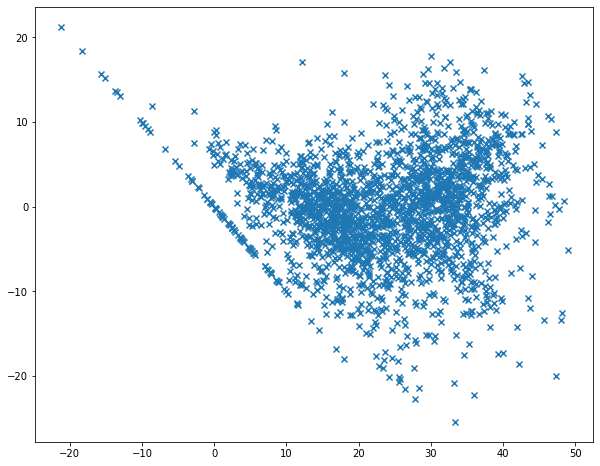

In [ ]:
#Checking Heteroscadacity
plt.figure(figsize=(10,8))
plt.scatter((y_pred_test),(y_test)-(y_pred_test),marker='x')

# **Implementing Lasso regression** (L1 Regularization)

In [ ]:
# Initalizing lasso regression
lasso = Lasso(alpha = 1, max_iter= 1000)
lasso.fit(X_train_std, y_train)

# Creating the model score
print(lasso.score(X_test_std, y_test))
print(lasso.score(X_train_std, y_train))


0.6376441677264435
0.6248259496038744


In [ ]:
# Predicted Train & Test values
y_pred_train_lasso=lasso.predict(X_train_std)
y_pred_test_lasso=lasso.predict(X_test_std)

In [ ]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_lasso))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_lasso))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_lasso))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 57.77330668819826
RMSE : 7.600875389598112
MAE : 5.907324870181666
R2 : 0.6248259496038744
Adjusted R2 : 0.6185527188494571


In [ ]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Lasso regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_lasso))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_lasso))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_lasso))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 57.24004755535299
RMSE : 7.565715270571117
MAE : 5.918353727530939
R2 : 0.6376441677264435
Adjusted R2 : 0.6315852685337598


In [ ]:
dict2={'Model':'Lasso regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

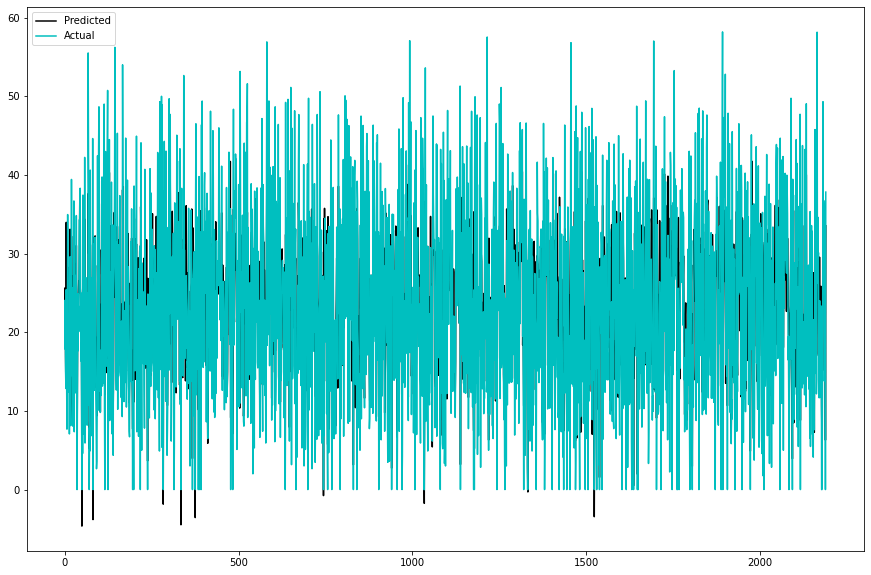

In [ ]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test_lasso, color='k')
plt.plot(np.array(y_test), color='c')
plt.legend(["Predicted","Actual"])
plt.show()

# **Implementing Ridge regression** (L2 Regularization)

In [ ]:
# Initalizing ridge regression
ridge = Ridge(alpha = 0.1)

ridge.fit(X_train_std,y_train)

Ridge(alpha=0.1)

In [ ]:
#checking score
ridge.score(X_train_std,y_train)

0.7449683509104188

In [ ]:
# Predicted Train & Test values
y_pred_train_ridge=ridge.predict(X_train_std)
y_pred_test_ridge=ridge.predict(X_test_std)

In [ ]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_ridge))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_ridge))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_ridge))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 39.27249675848447
RMSE : 6.266777222662736
MAE : 4.7543611195336855
R2 : 0.7449683509104188
Adjusted R2 : 0.7407040037821211


In [ ]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Ridge regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_ridge))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_ridge))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_ridge))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 37.6684987459545
RMSE : 6.137466802024635
MAE : 4.700159093293646
R2 : 0.7615410748849161
Adjusted R2 : 0.7575538378648775


In [ ]:
dict2={'Model':'Ridge regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

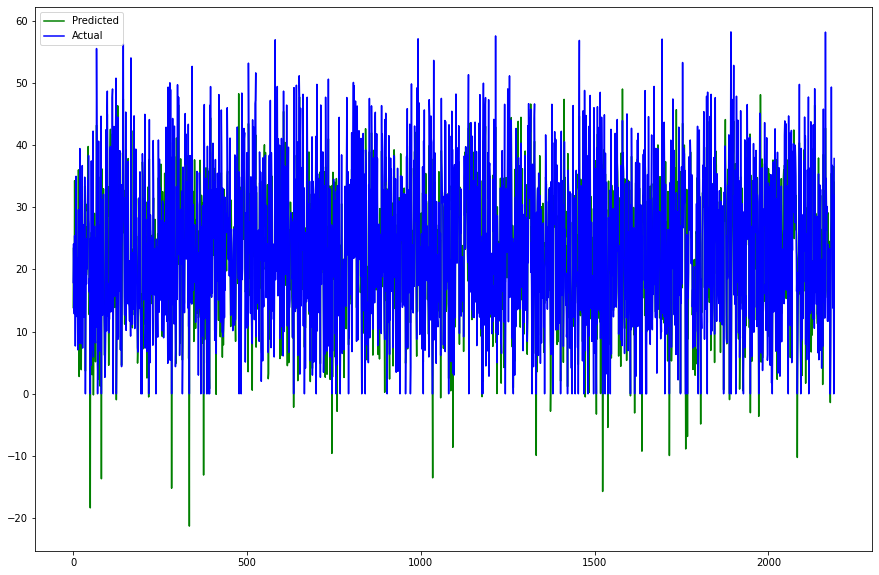

In [ ]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test_ridge, color='g')
plt.plot(np.array(y_test), color='b')
plt.legend(["Predicted","Actual"])
plt.show()

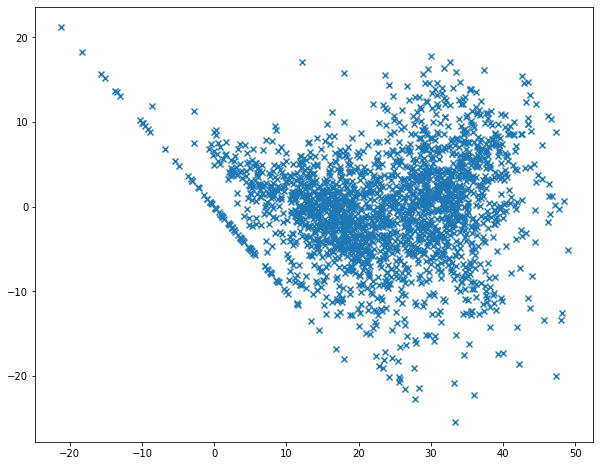

In [ ]:
#Checking Heteroscadacity
plt.figure(figsize=(10,8))
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge),marker='x')

In [ ]:
# Initializing model
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
elasnet.fit(X_train_std,y_train)

ElasticNet(alpha=0.1)

In [ ]:
#checking score
elasnet.score(X_train_std, y_train)

0.7401061700535496

In [ ]:
# Train Test values
y_pred_train_en=elasnet.predict(X_train_std)
y_pred_test_en=elasnet.predict(X_test_std)

In [ ]:
# Calculating Performance Metrics for Train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_en))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_en))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_en))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 40.021227289076336
RMSE : 6.326233262303591
MAE : 4.818779503485301
R2 : 0.7401061700535496
Adjusted R2 : 0.7357605231060009


In [ ]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Elasticnet regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_en))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_en))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_en))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 38.7453720569081
RMSE : 6.2245780625603935
MAE : 4.793892009500275
R2 : 0.7547239714493114
Adjusted R2 : 0.7506227466337867


In [ ]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'Elasticnet regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

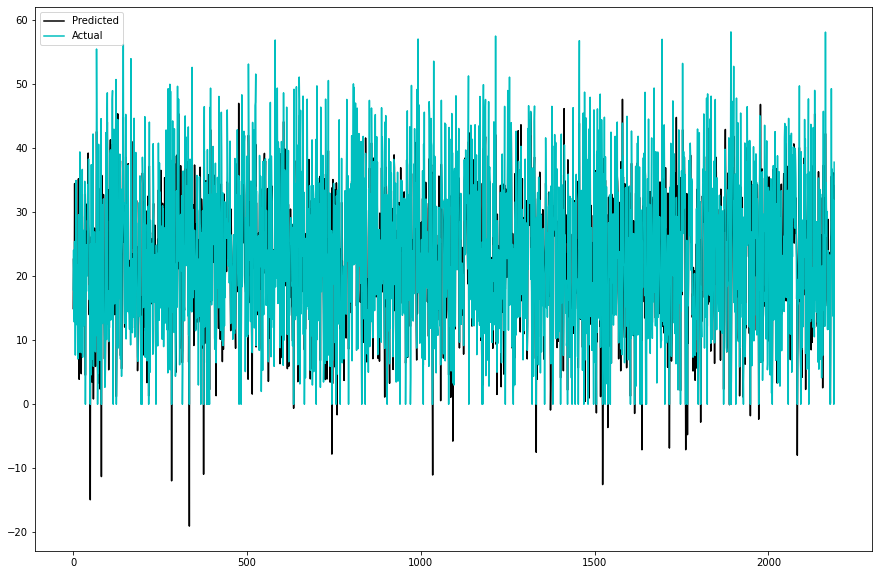

In [ ]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_en), color='k')
plt.plot(np.array(y_test), color='c')
plt.legend(["Predicted","Actual"])
plt.show()

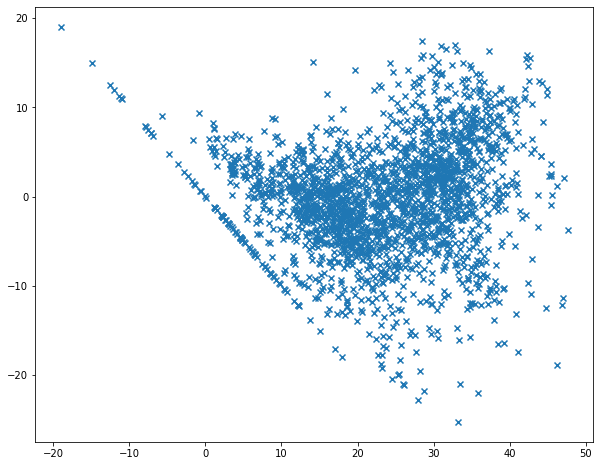

In [ ]:
#Checking Heteroscadacity
plt.figure(figsize=(10,8))
plt.scatter((y_pred_test_en),(y_test)-(y_pred_test_en),marker='x')

# **Implementing Decision Tree Regression**

In [ ]:
#Initilazing the model
dt_regr = DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9, max_leaf_nodes=100)

In [ ]:
dt_regr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [ ]:
#Train Test values
y_pred_train_d = dt_regr.predict(X_train)
y_pred_test_d = dt_regr.predict(X_test)

In [ ]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_d))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_d))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_d))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 49.569439701998775
RMSE : 7.040556775000026
MAE : 5.102821301983323
R2 : 0.6781010377468256
Adjusted R2 : 0.672718611996192


In [ ]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Decision tree regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# Calculating Performance Metrics for Train data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_d))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_d))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_d))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 57.5690589020995
RMSE : 7.587427686778932
MAE : 5.4966673877912315
R2 : 0.635561374551569
Adjusted R2 : 0.6294676492770017


In [ ]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'Decision tree regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

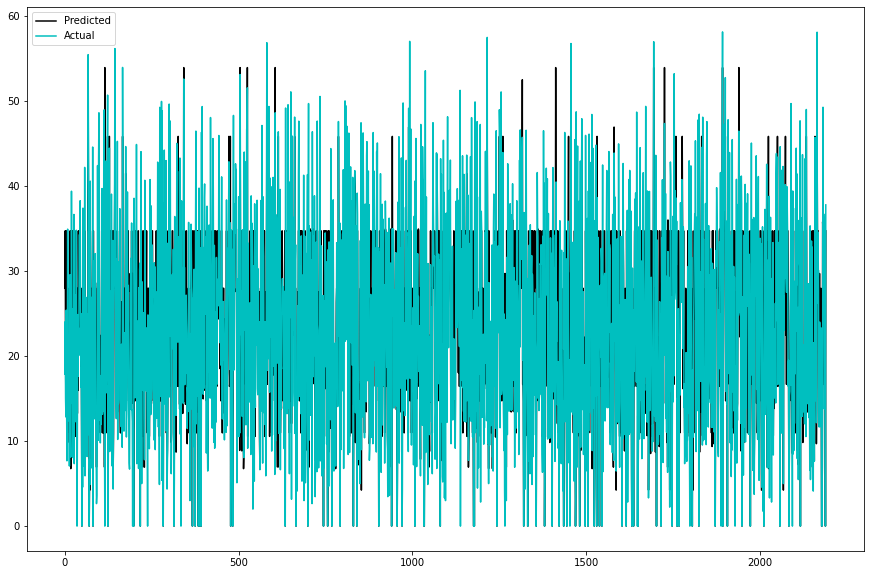

In [ ]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test_d, color='k')
plt.plot(np.array(y_test), color='c')
plt.legend(["Predicted","Actual"])
plt.show()

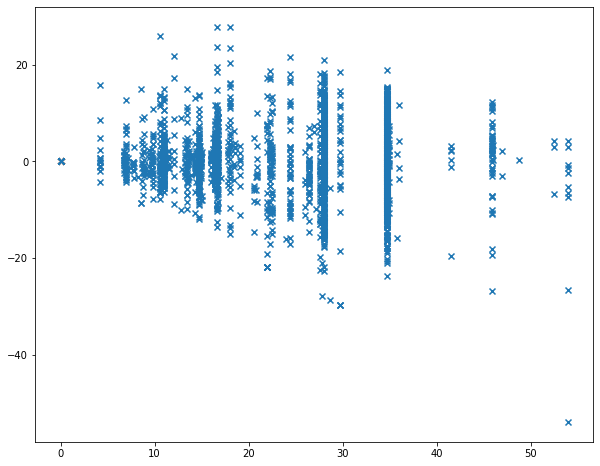

In [ ]:
#Checking Heteroscadacity
plt.figure(figsize=(10,8))
plt.scatter((y_pred_test_d),(y_test)-(y_pred_test_d),marker='x')

# **Implementng Random Forest Regression** 

In [ ]:
# Initalizing the Model
rf_model = RandomForestRegressor()

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
#Train test values
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

In [ ]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_rf))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_rf))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_rf))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 2.1607785077607917
RMSE : 1.4699586755282583
MAE : 0.9793463180715833
R2 : 0.9859681214173758
Adjusted R2 : 0.9857334964155298


In [ ]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Random forest regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# Calculating Performance Metrics for Test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_rf))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_rf))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_rf))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 16.673361181471297
RMSE : 4.083302729589284
MAE : 2.667923109031906
R2 : 0.8944499537344526
Adjusted R2 : 0.8926850667555581


In [ ]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'Random forest regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

In [ ]:
# Feature importances
rf_model.feature_importances_

array([3.20628602e-01, 1.62832262e-01, 1.54320447e-02, 1.63662078e-02,
       3.54086463e-02, 3.48593951e-02, 1.28356039e-03, 4.55464854e-03,
       1.33685770e-02, 2.09153106e-02, 2.94283068e-02, 2.55967233e-02,
       8.27855585e-03, 3.69050434e-03, 1.32267353e-02, 9.78728757e-04,
       2.36874096e-03, 1.01258351e-03, 2.58701086e-04, 2.30841361e-04,
       3.97260612e-04, 1.52783621e-03, 3.60648078e-03, 1.04482159e-02,
       3.13373283e-02, 1.75824887e-02, 1.25828155e-02, 1.26803188e-02,
       9.73837263e-03, 4.12395810e-03, 7.56252315e-03, 1.74755698e-03,
       1.16317768e-02, 3.23224323e-03, 1.50853509e-01, 1.02276396e-02])

In [ ]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

In [ ]:
plt.style.use('dark_background')

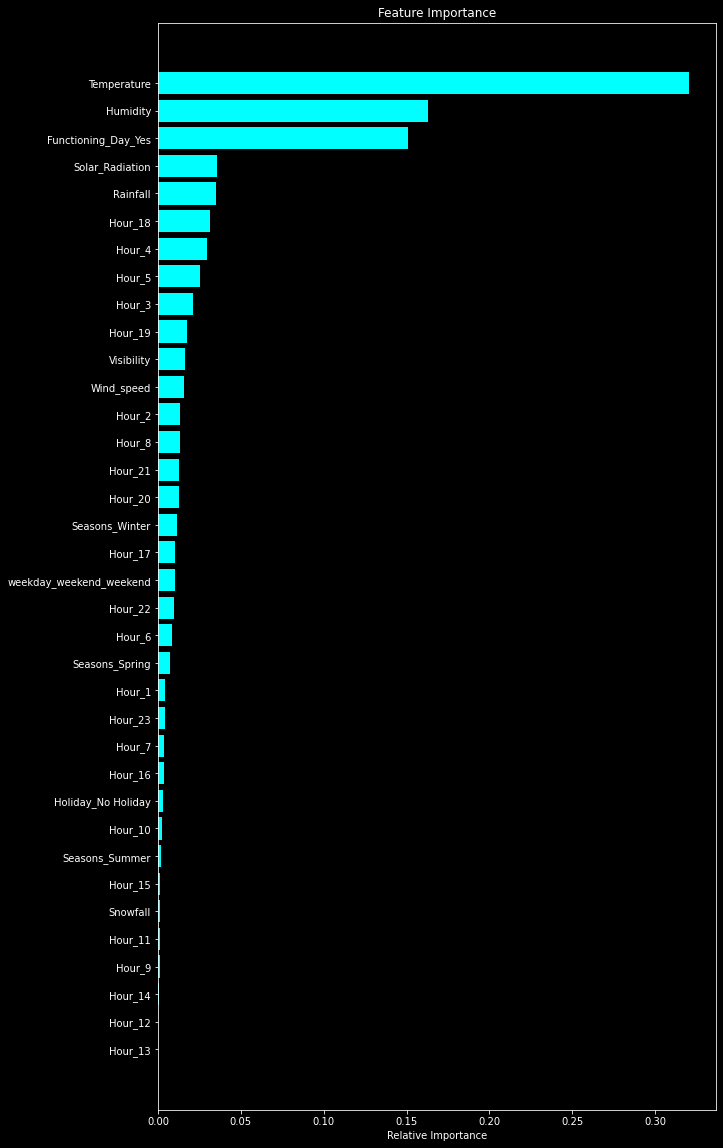

In [ ]:
#Plotting figure
plt.figure(figsize=(10,20))
plt.style.use('dark_background')
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='aqua', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **Implementing XG Boost Regression**

In [ ]:
# Using Pandas get Dummies for Encoding categorical features
dataset2 = pd.get_dummies(dataset,drop_first=True,sparse=False) 


In [ ]:
x = dataset2.drop(columns=['Rented_Bike_Count'], axis=1)
y = np.sqrt(dataset2 ['Rented_Bike_Count'])
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=0)

In [ ]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype           
---  ------                   --------------  -----           
 0   Rented_Bike_Count        8760 non-null   int64           
 1   Temperature              8760 non-null   float64         
 2   Humidity                 8760 non-null   int64           
 3   Wind_speed               8760 non-null   float64         
 4   Visibility               8760 non-null   int64           
 5   Solar_Radiation          8760 non-null   float64         
 6   Rainfall                 8760 non-null   float64         
 7   Snowfall                 8760 non-null   float64         
 8   Hour_1                   8760 non-null   Sparse[uint8, 0]
 9   Hour_2                   8760 non-null   Sparse[uint8, 0]
 10  Hour_3                   8760 non-null   Sparse[uint8, 0]
 11  Hour_4                   8760 non-null   Sparse[uint8, 0]
 12  Hour_5

In [ ]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented_Bike_Count        8760 non-null   int64  
 1   Temperature              8760 non-null   float64
 2   Humidity                 8760 non-null   int64  
 3   Wind_speed               8760 non-null   float64
 4   Visibility               8760 non-null   int64  
 5   Solar_Radiation          8760 non-null   float64
 6   Rainfall                 8760 non-null   float64
 7   Snowfall                 8760 non-null   float64
 8   Hour_1                   8760 non-null   uint8  
 9   Hour_2                   8760 non-null   uint8  
 10  Hour_3                   8760 non-null   uint8  
 11  Hour_4                   8760 non-null   uint8  
 12  Hour_5                   8760 non-null   uint8  
 13  Hour_6                   8760 non-null   uint8  
 14  Hour_7                  

In [ ]:
# Initializing the model
xgb_r = XGBRegressor()

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Seasons            8760 non-null   object  
 10  Holiday            8760 non-null   object  
 11  Functioning_Day    8760 non-null   object  
 12  weekday_weekend    8760 non-null   category
dtypes: category(2), float64(5), int64(3), object(3)
memory usage: 770.9+ KB


In [ ]:
#Fitting the model
xgb_r.fit(x_train, y_train)

[10:39:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
#Train Test values
y_pred_train_xgb1 = xgb_r.predict(x_train)
y_pred_test_xgb1 = xgb_r.predict(x_test)

In [ ]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_xgb1))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_xgb1))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_xgb1))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_xgb1))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 21.256500542609942
RMSE : 4.610477257574312
MAE : 3.4673082431006756
R2 : 0.8622687069560269
Adjusted R2 : 0.8599657220282131


In [ ]:
dict1={'Model':'XG Boost Regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# Calculating Performance Metrics for Test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_xgb1))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_xgb1))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_xgb1))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_xgb1))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 24.37859922862081
RMSE : 4.937468909129536
MAE : 3.680789990641545
R2 : 0.845201735913033
Adjusted R2 : 0.8426133766435808


In [ ]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'XG Boost Regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

In [ ]:
# Feature importances
xgb_r.feature_importances_

array([0.07162265, 0.04578086, 0.00245648, 0.00253861, 0.04117617,
       0.0705687 , 0.00310472, 0.00787817, 0.02312545, 0.03585256,
       0.04502678, 0.04587869, 0.0270237 , 0.        , 0.01966982,
       0.        , 0.01415211, 0.01105545, 0.        , 0.        ,
       0.        , 0.        , 0.00400919, 0.02192985, 0.05757612,
       0.04744627, 0.03549253, 0.04673922, 0.04845765, 0.00602985,
       0.00512404, 0.00353153, 0.06711385, 0.00883632, 0.17034045,
       0.01046214], dtype=float32)

In [ ]:
features = X_train.columns
importances = xgb_r.feature_importances_
indices = np.argsort(importances)

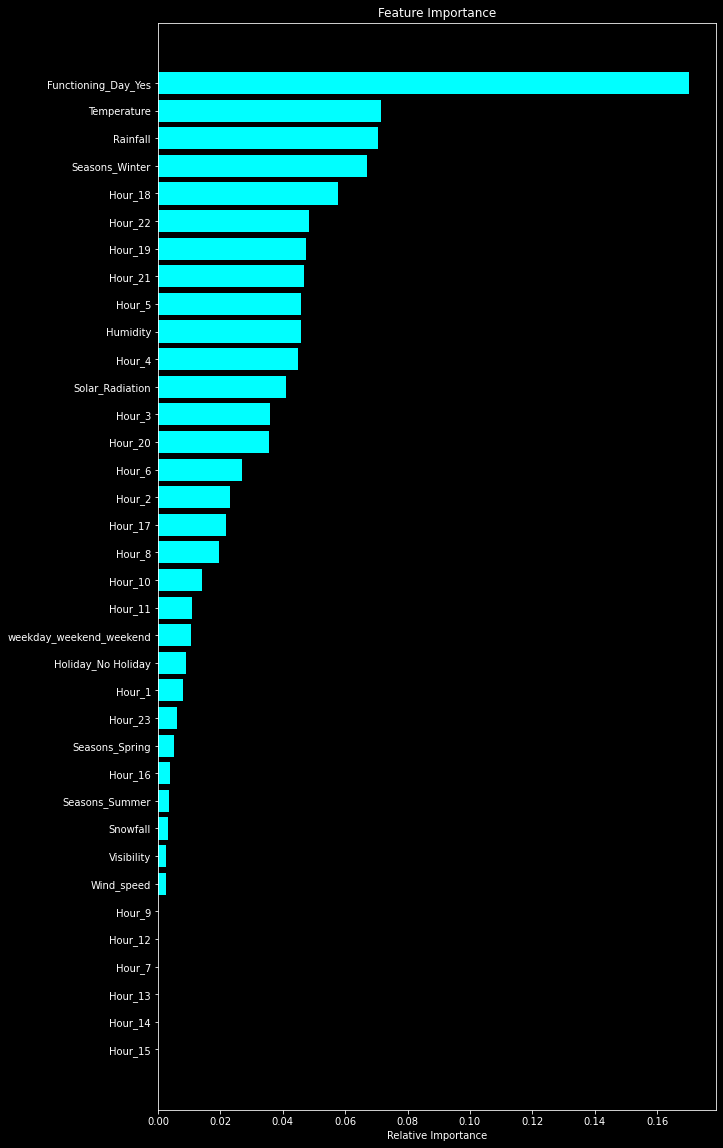

In [ ]:
#Plotting figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='aqua', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

In [ ]:
#Fitting the model
xgb_r.fit(X_train_std, y_train)

[09:06:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
#Train Test values
y_pred_train_xgb = xgb_r.predict(X_train_std)
y_pred_test_xgb = xgb_r.predict(X_test_std)

In [ ]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_xgb))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_xgb))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_xgb))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_xgb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 21.12766118589964
RMSE : 4.596483567456718
MAE : 3.4510874048047175
R2 : 0.8627990904988274
Adjusted R2 : 0.8605049740371264


In [ ]:
dict1={'Model':'XG Boost Regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# Calculating Performance Metrics for Test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_xgb))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_xgb))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_xgb))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_xgb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 23.809767582465607
RMSE : 4.879525343972055
MAE : 3.674144158457063
R2 : 0.8492732183661955
Adjusted R2 : 0.8467529377629364


In [ ]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'XG Boost Regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

In [ ]:
# Feature importances
xgb_r.feature_importances_

array([0.07162265, 0.04578086, 0.00245648, 0.00253861, 0.04117617,
       0.0705687 , 0.00310472, 0.00787817, 0.02312545, 0.03585256,
       0.04502678, 0.04587869, 0.0270237 , 0.        , 0.01966982,
       0.        , 0.01415211, 0.01105545, 0.        , 0.        ,
       0.        , 0.        , 0.00400919, 0.02192985, 0.05757612,
       0.04744627, 0.03549253, 0.04673922, 0.04845765, 0.00602985,
       0.00512404, 0.00353153, 0.06711385, 0.00883632, 0.17034045,
       0.01046214], dtype=float32)

In [ ]:
features = X_train.columns
importances = xgb_r.feature_importances_
indices = np.argsort(importances)

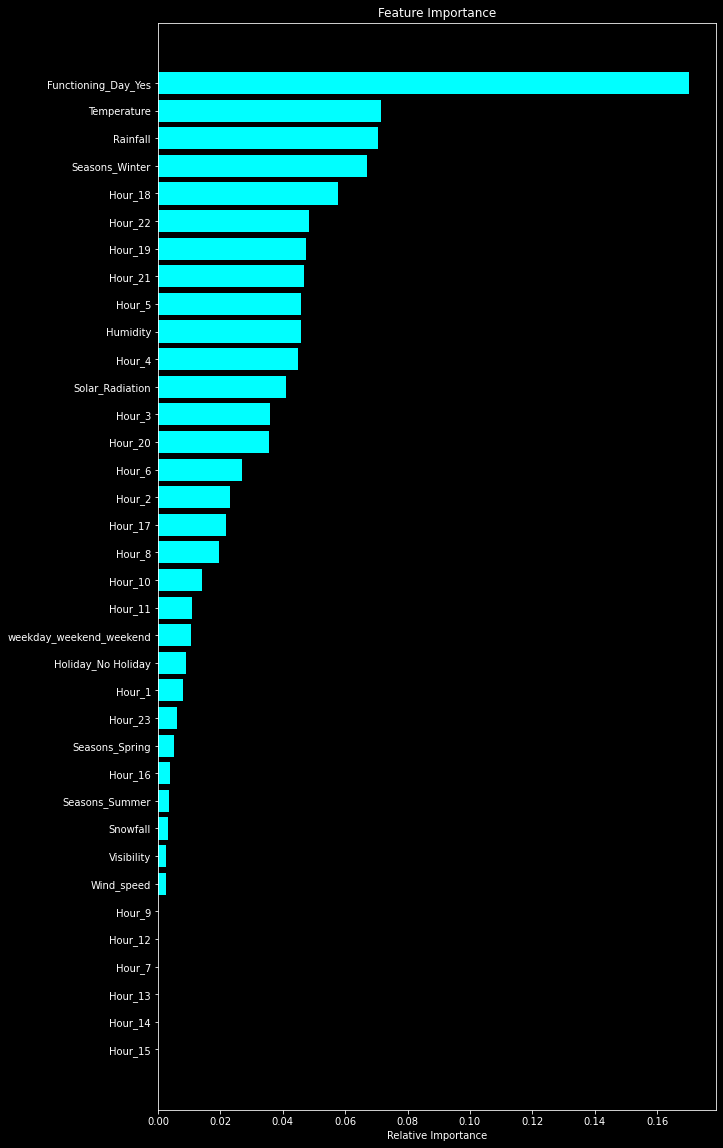

In [ ]:
#Plotting figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='aqua', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#**Hyperparameter tuning**
## ***For improvement of our model let's do some Hyper parameter tuning.***

## **XG boost Regressor with GridSearchCV**

In [ ]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
parameter_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
parameter_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

In [ ]:
# Create an instance of the XG Boost Regressor
xg_boost = XGBRegressor()

# Grid search
xg_grid = GridSearchCV(estimator=xg_boost,
                       param_grid = parameter_dict,
                       cv = 5, verbose=2)

xg_grid.fit(X_train_std,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[09:21:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.4s
[09:21:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[09:21:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[09:21:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[09:21:43] WARNING: /works

GridSearchCV(cv=5, estimator=XGBRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [ ]:
xg_grid.best_estimator_


XGBRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50)

In [ ]:
xg_optimal_model = xg_grid.best_estimator_

In [ ]:
xg_optimal_model.fit(X_train_std,y_train)

[09:29:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50)

In [ ]:
#Train Test values
y_pred_train_xg_opt = xg_optimal_model.predict(X_train_std)
y_pred_test_xg_opt= xg_optimal_model.predict(X_test_std)

In [ ]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_xg_opt))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_xg_opt))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_xg_opt))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_xg_opt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 5.0198343261117335
RMSE : 2.2404986779982115
MAE : 1.5179959942148415
R2 : 0.9674017001206274
Adjusted R2 : 0.9668566286874377


In [ ]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'XG boost regg GridserachCV',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# Calculating Performance Metrics for Test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_xg_opt))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_xg_opt))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_xg_opt))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_xg_opt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 15.113406754073504
RMSE : 3.887596526656734
MAE : 2.6310892424720804
R2 : 0.9043251828614361
Adjusted R2 : 0.9027254181531276


In [ ]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'XG boost regg GridserachCV',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

In [ ]:
xg_optimal_model.feature_importances_

array([0.01932194, 0.01674385, 0.00125385, 0.00136401, 0.00644222,
       0.02999112, 0.00191537, 0.00449585, 0.04169748, 0.05030302,
       0.06229652, 0.06014641, 0.01875806, 0.00801868, 0.02469084,
       0.00338914, 0.01627167, 0.01186576, 0.00141443, 0.00198628,
       0.0020505 , 0.00342443, 0.00795602, 0.03190948, 0.06958479,
       0.05578133, 0.05228912, 0.05629227, 0.05198077, 0.01379371,
       0.007346  , 0.00192255, 0.05233328, 0.00374533, 0.2023735 ,
       0.00485037], dtype=float32)

In [ ]:
features = X_train.columns
importance = xg_optimal_model.feature_importances_
index = np.argsort(importance)

Text(0.5, 0, 'Relative Importance')

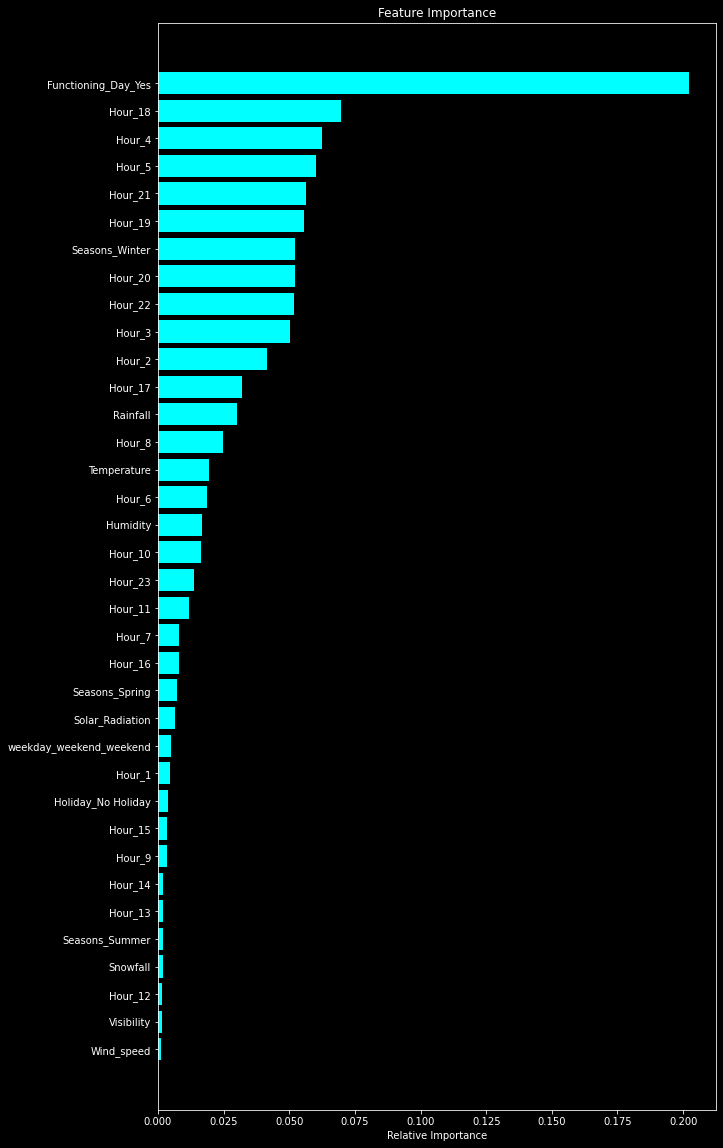

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.style.use('dark_background')
plt.title('Feature Importance')
plt.barh(range(len(index)), importance[index], color='aqua', align='center')
plt.yticks(range(len(index)), [features[i] for i in index])
plt.xlabel('Relative Importance')

**In our analysis, we initially did EDA on all the features of our datset. We first analysed our dependent variable i.e, 'Rented Bike Count' and also transformed it. Next we analysed categorical variable and dropped the variable who had majority of one class. we also analysed numerical variable, check out the correlation, distribution and their relationship with the dependent variable. We also removed some numerical features who had mostly 0 values and hot encoded the categorical variables.**

**Next we implemented 7 machine learning algorithms Linear Regression, Lasso,Ridge,Elastic Net,Decision Tree, Random Forest, XGBoost and XGBoost with Grid Search CV. We did some hyperparameter tuning to improve our model performance.**

**Following are the results of our evaluation:** 

In [ ]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model    MAE     MSE   RMSE     R2  \
Training set 0          Linear regression   4.754  39.272  6.267  0.745   
             1            Ridge regression  4.754  39.272  6.267  0.745   
             2            Lasso regression  5.907  57.773  7.601  0.625   
             3    Decision tree regression  5.039  45.914  6.776  0.702   
             4    Random forest regression  0.979   2.178  1.476  0.986   
             5         XG Boost Regression  3.451  21.128  4.596  0.863   
             6  XG boost regg GridserachCV  1.518   5.020  2.240  0.967   
             7  XG boost regg GridserachCV  1.518   5.020  2.240  0.967   
Test set     0          Linear regression   4.700  37.668  6.137  0.762   
             1            Ridge regression  4.700  37.668  6.137  0.762   
             2            Lasso regression  5.918  57.240  7.566  0.638   
             3       Elasticnet regression  4.794  38.745  6.225  0.755   
             4    Decision tree regression  5.375  54.255  7.366  0.657   
             5    Random forest regression  2.651  16.396  4.049  0.896   
             6         XG Boost Regression  3.674  23.810  4.880  0.849   
             7  XG boost regg GridserachCV  2.631  15.113  3.888  0.904   
             8  XG boost regg GridserachCV  2.631  15.113  3.888  0.904   

                Adj_R2  
Training set 0    0.74  
             1    0.74  
             2    0.62  
             3    0.70  
             4    0.99  
             5    0.86  
             6    0.97  
             7    0.97  
Test set     0    0.76  
             1    0.76  
             2    0.63  
             3    0.75  
             4    0.65  
             5    0.89  
             6    0.85  
             7    0.90  
             8    0.90

# **Final Observations:**

*    **Out of all above models Random forest Regressor gives the highest R2 score of 98% for Train Set and XG Boost Gridsearch CV gives the highest R2 score of 91% for Test set.**

*   **No overfitting is seen.**
*  **We can deploy XG Boost Gridsearch CV model.**